In [84]:
import pandas as pd
import numpy as np

In [85]:

df_example = pd.read_json("bike_ride.json")

In [86]:
df_example.head()

,sensor,time,seconds_elapsed,z,y,x,relativeAltitude,pressure,version,device name,recording time,platform,appVersion,device id,sensors,sampleRateMs
0,Accelerometer,1.679934e+18,-2.409675e+06,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AccelerometerUncalibrated,1.682344e+18,8.956055e-03,-0.800354,-0.473755,0.271881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AccelerometerUncalibrated,1.682344e+18,1.901904e-02,-0.847107,-0.480453,0.240311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AccelerometerUncalibrated,1.682344e+18,2.908228e-02,-0.821487,-0.501633,0.230270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AccelerometerUncalibrated,1.682344e+18,3.914526e-02,-0.768997,-0.521774,0.233582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df_example.columns

Index(['sensor', 'time', 'seconds_elapsed', 'z', 'y', 'x', 'relativeAltitude',
       'pressure', 'version', 'device name', 'recording time', 'platform',
       'appVersion', 'device id', 'sensors', 'sampleRateMs'],
      dtype='object')

In [88]:
#preprocessing data
df_example['time'] = pd.to_datetime(df_example['time'])

display(df_example.head(5))

,sensor,time,seconds_elapsed,z,y,x,relativeAltitude,pressure,version,device name,recording time,platform,appVersion,device id,sensors,sampleRateMs
0,Accelerometer,2023-03-27 16:21:37.548602624,-2.409675e+06,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AccelerometerUncalibrated,2023-04-24 13:42:52.697956096,8.956055e-03,-0.800354,-0.473755,0.271881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AccelerometerUncalibrated,2023-04-24 13:42:52.708018944,1.901904e-02,-0.847107,-0.480453,0.240311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AccelerometerUncalibrated,2023-04-24 13:42:52.718082304,2.908228e-02,-0.821487,-0.501633,0.230270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AccelerometerUncalibrated,2023-04-24 13:42:52.728145152,3.914526e-02,-0.768997,-0.521774,0.233582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_example = df_example.set_index('time')

In [90]:
df_example['sensor'].unique()

array(['Accelerometer', 'AccelerometerUncalibrated', 'Barometer',
       'Metadata'], dtype=object)

In [91]:
df_example_acc = df_example[df_example['sensor'] == 'AccelerometerUncalibrated']
display(df_example_acc.head(2))

,sensor,seconds_elapsed,z,y,x,relativeAltitude,pressure,version,device name,recording time,platform,appVersion,device id,sensors,sampleRateMs
time,,,,,,,,,,,,,,,
2023-04-24 13:42:52.099358464,Barometer,-0.589642,NaN,NaN,NaN,0.000000,976.017380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-24 13:43:49.875176704,Barometer,57.186177,NaN,NaN,NaN,1.078064,975.891571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:

df_example_acc = df_example_acc['z']
display(df_example_acc.head(3))

time
2023-04-24 13:42:52.099358464    0.000000
2023-04-24 13:43:49.875176704    1.078064
2023-04-24 13:44:47.565101568    0.665863
Name: relativeAltitude, dtype: float64

Analyse der Ausschlagsrichtung:

<Axes: xlabel='time'>

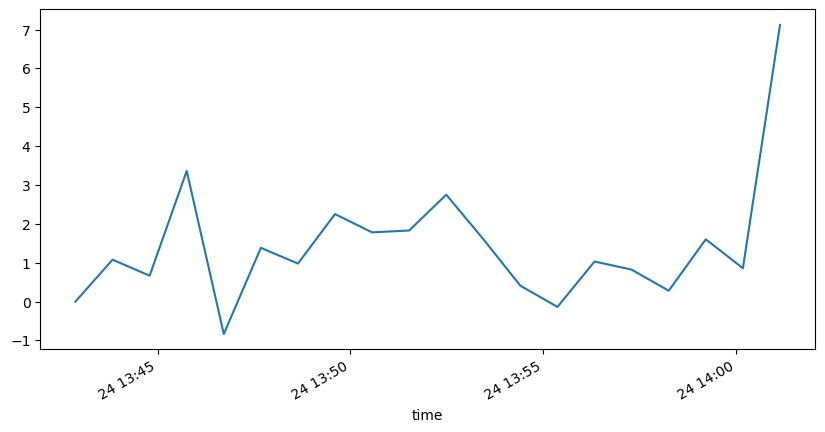

In [94]:
df_example_acc.plot(figsize=(10,5))